In [97]:
import pandas as pd

In [98]:
import numpy as np


In [99]:
data=pd.read_csv("salary.csv")

In [100]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [101]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [102]:
data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [103]:
data.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [104]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

<Axes: >

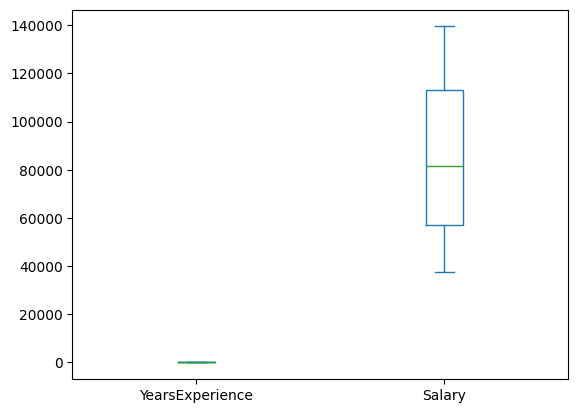

In [105]:
data.isnull().sum()
data.plot(kind='box')

<Axes: ylabel='Density'>

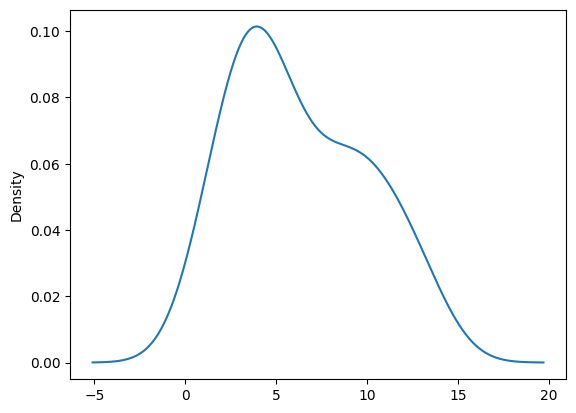

In [123]:
(data["YearsExperience"]).plot(kind='kde') 

<Axes: ylabel='Density'>

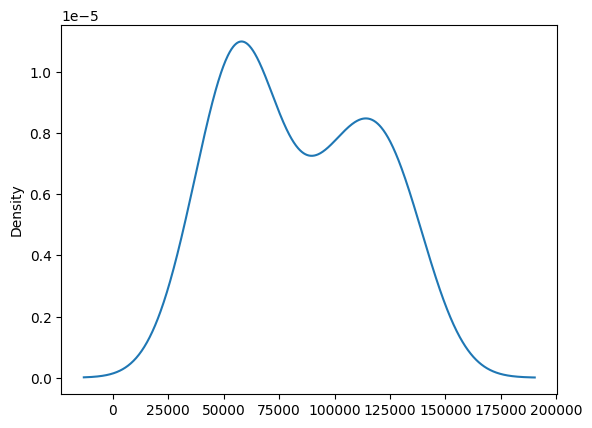

In [124]:
(data["Salary"]).plot(kind='kde') 

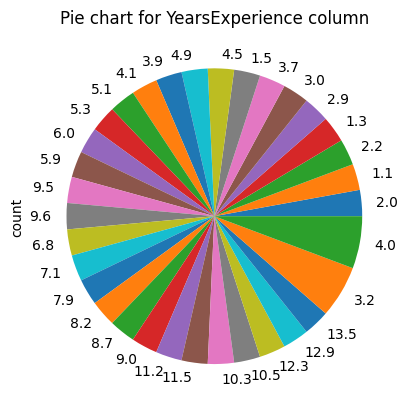

In [126]:
import matplotlib.pyplot as plt
data["YearsExperience"].value_counts().sort_values(ascending=True).plot(kind="pie")
plt.title("Pie chart for YearsExperience column")
plt.show()

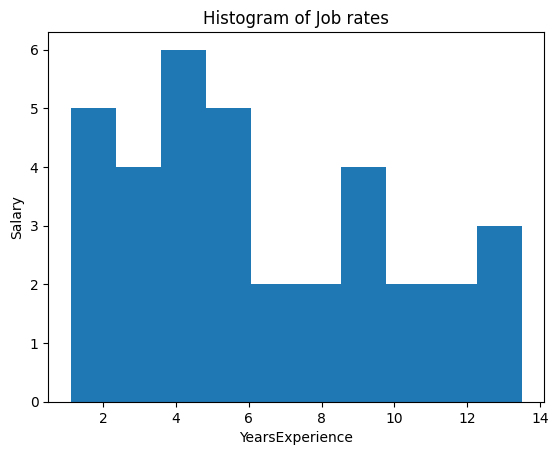

In [129]:
plt.hist(data["YearsExperience"])
plt.title("Histogram of Job rates")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()


In [130]:
data["YearsExperience"].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5, 11.2, 11.5, 12.3, 12.9, 13.5])

In [ ]:
import matplotlib.pyplot as plt

In [107]:
import seaborn as sns

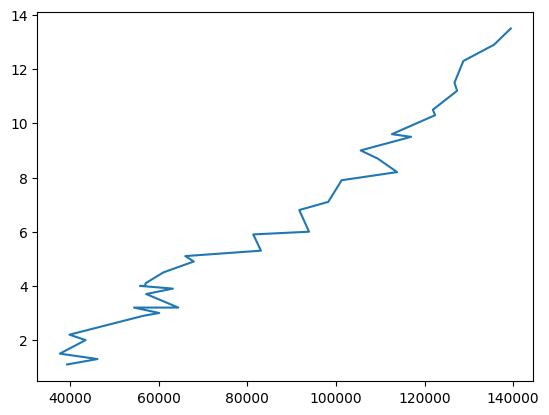

In [108]:
plt.plot(data['Salary'],data['YearsExperience'])

In [109]:
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [110]:
from sklearn.model_selection import train_test_split
x = data.drop('Salary',axis = 1)

In [111]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [112]:
y=data['Salary']

In [113]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [114]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42) 


In [115]:
from sklearn.linear_model import LinearRegression 

L=LinearRegression()

In [116]:
L.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [117]:
y_pred=L.predict(xtest)

In [118]:
print(L.score(xtest, ytest)) 

0.8914234140042779


In [119]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

base_estimator = DecisionTreeClassifier()

# Initialize BaggingClassifier using the instance
bagging_model = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=10,        # Number of trees
    max_samples=0.8,        # Fraction of training samples per tree
    max_features=1.0,       # Fraction of features per tree
    bootstrap=True,         # Sampling with replacement
    random_state=42         # For reproducibility
)

In [120]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)

,estimator,None
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [121]:

y_pred=bag.predict(xtest)
y_pred


array([101302,  93940, 126756,  93940, 109431,  66029, 112635,  60150,
        46205, 139465,  63218])

In [122]:
import joblib
joblib.dump(L,"linearmodel.pkl")

['linearmodel.pkl']